In [1]:
# Импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook

In [2]:
from tensorflow.keras.datasets import mnist #загрузим набор данных MNIST, который содержит изображения рукописных цифр и соответствующие им метки.

![](изображения/single_lair_perceptron.jpg)
Перцептрон - это простая форма нейронной сети, представляющая собой один или несколько нейронов,
которые могут быть обучены для классификации входных данных.
Входные данные обычно представляются в виде вектора, а каждый элемент вектора представляет собой признак данных.
Перцептрон определяет, принадлежит ли вектор к одному классу или другому.
Каждый нейрон в скрытом слое связан со всеми нейронами во входном слое,
а каждый нейрон в выходном слое связан со всеми нейронами в скрытом слое.
Количество нейронов в скрытом слое может варьироваться в зависимости от задачи,
но общее правило состоит в том, чтобы использовать достаточное количество нейронов для того,
чтобы модель могла выучить сложные зависимости между входными данными и выходными значениями.

# <center> 「 Data Loading and preprocessing. 」 </center>

In [3]:
# Загрузка данных MNIST 70_000 x 784
(X_train, y_train), (X_test, y_test) = mnist.load_data() # загружаем данные MNIST из Keras и получаем кортеж из четырех массивов numpy

In [5]:
print('TRAIN:', X_train.shape, y_train.shape)
print('TEST', X_test.shape, y_test.shape)

TRAIN: (60000, 28, 28) (60000,)
TEST (10000, 28, 28) (10000,)
TRAIN: (60000, 28, 28) (60000,)
TEST (10000, 28, 28) (10000,)


In [27]:
y_train = y_train[:] # тут при необходимости можно сократить размер датасета
y_test = y_test[:] # тут при необходимости можно сократить размер датасета

# Преобразование данных в нужный формат
X_train = X_train.reshape(60_000, 784)[:] # преобразуем массив X_train из трехмерного массива размера (60000, 28, 28) в двумерный массив размера (60000, 784). тут при необходимости можно сократить размер массива
X_test = X_test.reshape(10_000, 784)[:] # преобразуем массив X_test из трехмерного массива размера (10000, 28, 28) в двумерный массив размера (10000, 784). тут при необходимости можно сократить размер массива
X_train = X_train / 255 # нормализуем значения в массиве
X_test = X_test / 255 #нормализуем значения в массиве
y_train_onehot = np.zeros((y_train.size, y_train.max() + 1)) # создаем двумерный массив y_train_onehot из нулей с размерностью (60000, 10), где 10 - количество классов цифр в MNIST.
y_train_onehot[np.arange(y_train.size), y_train] = 1 # задаем значение 1 для каждого правильного класса в y_train_onehot с помощью индексирования массива.

'''
Данные изображений цифр имеют размер 28x28 пикселей, поэтому они преобразуются в одномерный массив размера 784.
Далее данные нормализуются путем деления каждого значения на 255.
В конце обучающих данных преобразуются в one-hot кодировку, которая используется для обучения модели.
'''

'\nДанные изображений цифр имеют размер 28x28 пикселей, поэтому они преобразуются в одномерный массив размера 784.\nДалее данные нормализуются путем деления каждого значения на 255.\nВ конце обучающих данных преобразуются в one-hot кодировку, которая используется для обучения модели.\n'

In [28]:
print('TRAIN:', X_train.shape, y_train.shape)
print('TEST', X_test.shape, y_test.shape)

TRAIN: (60000, 784) (60000,)
TEST (10000, 784) (10000,)


In [20]:
X_train[0][130:300]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11764706, 0.14117647, 0.36862745, 0.60392157,
       0.66666667, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.99215686, 0.88235294, 0.6745098 , 0.99215686, 0.94901961,
       0.76470588, 0.25098039, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.19215686, 0.93333

# Давайте взглянем на то, как выглядят цифры в двтвсете

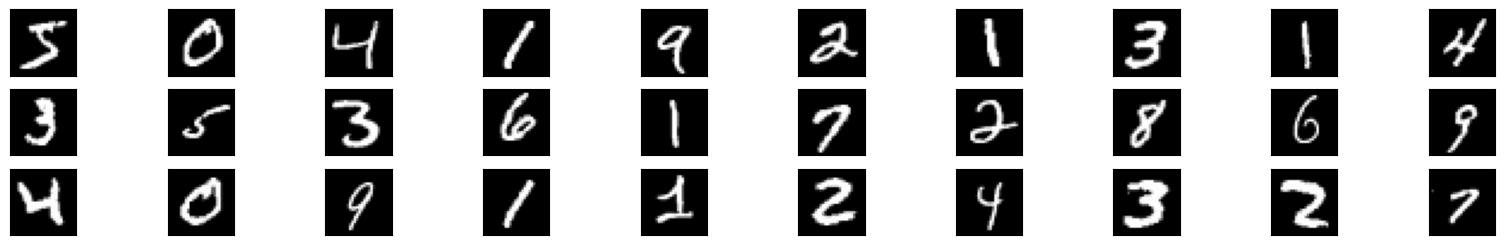

In [4]:
plt.figure(figsize=(20,5))
for i in range(30):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape((28, 28)), cmap='gray')

plt.show()

# <center> 「 Определим параметры модели. 」 </center>

In [28]:
# Определим параметры модели, такие как количество нейронов в скрытом слое, коэффициент обучения, количество эпох и т.д.
n_inputs = X_train.shape[1] # Количество входных нейронов
n_hidden = 522  # Количество нейронов в скрытом слое
n_outputs = len(np.unique(y_train))  # Количество выходных нейронов

learning_rate = 0.1 # Скорость обучения
n_epochs = 501 # Количество эпох обучения

# Заметки по переменным learning_rate, n_epochs


Переменная learning_rate отвечает за скорость обучения, которая контролирует, насколько быстро модель будет обучаться на данных.
Слишком высокое значение скорости обучения может привести к тому, что модель будет "скакать" между значениями параметров,
приводя к нестабильности и низкой производительности.
Слишком низкое значение, напротив, может привести к слишком медленному обучению или застреванию в локальных минимумах.
При обновлении весов и пороговых значений в процессе обучения модели с помощью алгоритма градиентного спуска используется градиент функции потерь по отношению к параметрам модели.
Скорость обучения определяет, насколько сильно мы изменяем значения параметров модели в направлении антиградиента функции потерь.
Чем выше скорость обучения, тем сильнее изменение весов и пороговых значений, и тем быстрее модель сходится к оптимальным параметрам.
Однако, при очень большой скорости обучения модель может не сойтись, а при очень маленькой скорости обучения процесс обучения может занять слишком много времени.

Переменная n_epochs определяет количество эпох, которое модель будет обучаться на данных.
Одна эпоха означает, что все обучающие данные были использованы один раз для обучения модели.
Таким образом, n_epochs определяет, сколько раз модель будет просматривать все обучающие данные в процессе обучения.
Значение n_epochs может влиять на производительность модели.
Слишком маленькое значение может привести к тому, что модель не будет полностью обучена на данных, что приведет к низкой точности.
С другой стороны, слишком большое значение может привести к переобучению модели, когда модель "запоминает" обучающие данные,
но не может обобщить их на новые данные, приводя к плохой производительности на тестовых данных.
Эпоха заканчивается, когда модель просмотрела все партии обучающих данных.
Обычно, чем больше эпох, тем лучше модель учится на обучающих данных, однако существует риск переобучения, если количество эпох слишком велико.
(Если обучающий набор состоит из 50_000 записей, а количество эпох равно 1000, то модель пройдет через 50_000 записей в обучающем наборе 1000 раз,
чтобы обновить веса и пороговые значения. В общей сложности модель будет просматривать 50_000 x 1000 = 50 миллионов записей во время обучения.)


# Затем мы должны инициализировать веса и пороговые значения для каждого нейрона в нашей модели.

In [29]:
# Инициализация весов
weights_input_hidden = np.random.uniform(-0.5, 0.5, size=(n_inputs, n_hidden)) # инициализируем матрицу весов между входным и скрытым слоями случайными значениями из равномерного распределения в диапазоне [-0.5, 0.5].
bias_hidden = np.zeros(n_hidden) # инициализируем пороговые значения для скрытого слоя нулями.

weights_hidden_output = np.random.uniform(-0.5, 0.5, size=(n_hidden, n_outputs)) # инициализируем матрицу весов между скрытым и выходным слоями случайными значениями из равномерного распределения в диапазоне [-0.5, 0.5].
bias_output = np.zeros(n_outputs) # инициализируем пороговые значения для скрытого слоя нулями.

"""
Мы инициализировали веса между входным слоем и скрытым слоем (weights_input_hidden) и
между скрытым слоем и выходным слоем (weights_hidden_output) случайными значениями в диапазоне от -0.5 до 0.5.
Мы также инициализировали пороговые значения для каждого нейрона в скрытом слое (bias_hidden) и выходном слое (bias_output) нулями.
bias_hidden и bias_output - это векторы смещений (bias) для нейронов в скрытом и выходном слоях соответственно.

Смещение (bias) - это параметр, который добавляется к линейной комбинации входных сигналов, вычисленной в нейроне, перед применением функции активации.
Смещение позволяет сдвинуть функцию активации в нужную сторону, что улучшает способность модели к аппроксимации данных.
В ходе обучения, эти смещения обновляются вместе с весами нейронов в скрытом и выходном слоях,
чтобы минимизировать функцию потерь и повысить точность предсказания.
"""

'\nМы инициализировали веса между входным слоем и скрытым слоем (weights_input_hidden) и\nмежду скрытым слоем и выходным слоем (weights_hidden_output) случайными значениями в диапазоне от -0.5 до 0.5.\nМы также инициализировали пороговые значения для каждого нейрона в скрытом слое (bias_hidden) и выходном слое (bias_output) нулями.\n'

Теперь мы можем определить функции активации для каждого нейрона в нашей модели. Мы будем использовать сигмоидальную функцию активации для скрытого слоя и softmax-функцию для выходного слоя.

In [22]:
# Определение функций активации у нейронов скрытого слоя
# Sigmoid - это логистическая функция, пригодная для применения при небольшом числе скрытых слоев: до 5-6. Это связано с алгоритмом обучения back propagation и проблемой затухания градиентов.
def sigmoid(x): # Функция sigmoid принимает на вход значение 'x' и возвращает значение, которое находится в диапазоне от 0 до 1.
    return 1 / (1 + np.exp(-x))

# Определение функций активации у выходных нейронов
def softmax(x): # Функция softmax принимает на вход вектор значений и возвращает вероятности для каждого класса, сумма которых равна 1.
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

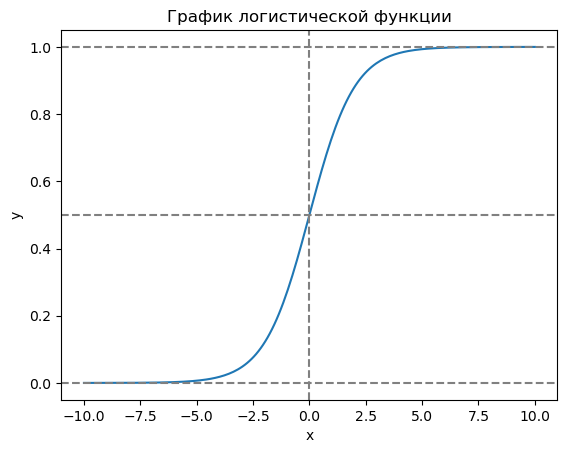

In [23]:
# Посмотрим, как выглядит график функции активации sigmoid
def show_sigmoid():
    # Создаем массив значений аргумента
    x = np.linspace(-10, 10, 200)

    # Вычисляем значения функции на каждой точке x
    y = sigmoid(x)

    # Строим график функции
    plt.plot(x, y)

    # Настраиваем оси
    plt.xlabel('x')
    plt.ylabel('y')

    # Добавляем заголовок
    plt.title('График логистической функции')

    # Добавляем вертикальную ось в точке x = 0
    plt.axvline(x=0, color='gray', linestyle='--')

    # Добавляем горизонтальную ось в точке y = 0.5
    plt.axhline(y=0.5, color='gray', linestyle='--')
    plt.axhline(y=0, color='gray', linestyle='--')
    plt.axhline(y=1, color='gray', linestyle='--')
    #
    # Отображаем график
    plt.show()

show_sigmoid()

# Как работают функция активации sigmoid и softmax?

Функция активации sigmoid возвращает результат, который лежит в диапазоне от 0 до 1 и может быть интерпретирован как вероятность активации нейрона.
Эта функция используется для генерации нелинейности и усиления нелинейной зависимости между входом и выходом скрытого слоя.

Функция активации softmax используется для преобразования выходных значений нейронов в вероятности.
Функция softmax преобразует выходные значения в вектор вероятностей, сумма которых равна 1.
Это позволяет использовать эту функцию для классификации в случае многоклассовых задач,
где каждый нейрон выходного слоя представляет собой вероятность принадлежности к соответствующему классу.
Чтобы нейронная сеть корректно обучалась при таких выходах, она должна иметь адекватный критерий качества. Здесь хорошо подходит мера,
известная как категориальная перекрестная энтропия (categorical cross-entropy) в качестве функции потерь.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(p_{ij})$$
где $N$ - количество примеров, $C$ - количество классов, $y_{ij}$ - 1, если метка $i$-го примера равна $j$-му классу, и 0 в противном случае,
$p_{ij}$ - вероятность того, что $i$-й пример принадлежит к классу $j$, вычисленная моделью.

Знак минуса перед суммой нужен для того, чтобы результат был положительным. Логарифм используется, чтобы увеличить вклад ошибочных предсказаний.

# <center> 「 Обучение модели и вывод результата. 」 </center>

# Теперь мы можем реализовать процесс обучения нашей модели. Мы будем использовать алгоритм обратного распространения ошибки для обновления весов и пороговых значений на каждой эпохе.

In [31]:
%%time
# Обучение модели
for epoch in tqdm_notebook(range(n_epochs)): # цикл обучения для каждой эпохи.

    # Прямое распространение
    # Скрытый слой
    hidden_inputs = np.dot(X_train, weights_input_hidden) + bias_hidden # вычисляет сумму входных значений и соответствующих весов скрытого слоя, а затем добавляет пороговые значения.
    hidden_outputs = sigmoid(hidden_inputs) # результат применения функции активации сигмоиды к выходному значению скрытого слоя.

    # Выходной слой
    output_inputs = np.dot(hidden_outputs, weights_hidden_output) + bias_output # вычисляет сумму выходных значений скрытого слоя и соответствующих весов выходного слоя, а затем добавляет пороговые значения.
    y_pred = softmax(output_inputs) # результат применения функции активации softmax к выходному значению выходного слоя.

    # Обратное распространение ошибки
    error = y_pred - np.eye(n_outputs)[y_train] # вычисляем ошибку между предсказанным и правильным классами.
    grad_output = error / len(X_train) # вычисляем градиент для выходного слоя.
    grad_hidden = np.dot(grad_output, weights_hidden_output.T) * hidden_outputs * (1 - hidden_outputs) # вычисляем градиент для скрытого слоя с помощью обратного распространения ошибки на всей обучающей выборке за одну эпоху.

    # Обновление весов и пороговых значений
    # веса между скрытым и выходным слоями
    weights_hidden_output -= learning_rate * np.dot(hidden_outputs.T, grad_output) # обновляем веса между скрытым и выходным слоями, учитывая скорость обучения и градиент выходного слоя.
    bias_output -= learning_rate * np.sum(grad_output, axis=0) # обновляем пороговые значения выходного слоя, учитывая скорость обучения и градиент выходного слоя.

    # веса между входным и скрытым слоями
    weights_input_hidden -= learning_rate * np.dot(X_train.T, grad_hidden) # обновляем веса между входным и скрытым слоями, учитывая скорость обучения и градиент скрытого слоя.
    bias_hidden -= learning_rate * np.sum(grad_hidden, axis=0) # обновляем пороговые значения скрытого слоя, учитывая скорость обучения и градиент скрытого слоя.

    # Вычисление функции потерь на текущей эпохе.
    loss = np.mean(-np.log(y_pred[np.arange(len(X_train)), y_train]))

    # Выводим значение функции потерь на
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


'''
На каждой сотой эпохе мы выводим значение функции потерь, которое показывает,
насколько точно наша модель предсказывает правильный класс для каждого обучающего примера.
Чем меньше значение функции потерь, тем лучше работает модель.
В конце процесса обучения мы можем использовать обученную модель для предсказания классов для новых данных.
Для этого мы просто передаем новые данные через нашу модель и получаем предсказанные классы.
'''


# [01:20<00:00, 14.52it/s] y_train = y_train[:6000] n_epochs = 500 Accuracy: 0.8515
# [06:45<00:00, 11.01it/s] y_train = y_train[:16000] n_epochs = 1000 Accuracy: 0.8805

# y_train = y_train[:] n_epochs = 1500 n_hidden = 400 Accuracy: 0.9233
# y_train = y_train[:] n_epochs = 1500 n_hidden = 522 Accuracy: 0.9241
# y_train = y_train[:] n_epochs = 2500 n_hidden = 522 Accuracy: 0.9349

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/501 [00:00<?, ?it/s]

Epoch 0, Loss: 6.0431
Epoch 100, Loss: 0.6038
Epoch 200, Loss: 0.4315
Epoch 300, Loss: 0.3597
Epoch 400, Loss: 0.3164
Epoch 500, Loss: 0.2860
Wall time: 1min 20s


'\nНа каждой сотой эпохе мы выводим значение функции потерь, которое показывает,\nнасколько точно наша модель предсказывает правильный класс для каждого обучающего примера.\nЧем меньше значение функции потерь, тем лучше работает модель.\nВ конце процесса обучения мы можем использовать обученную модель для предсказания классов для новых данных.\nДля этого мы просто передаем новые данные через нашу модель и получаем предсказанные классы.\n'

In [32]:
# Предсказание классов для новых данных
hidden_inputs = np.dot(X_test, weights_input_hidden) + bias_hidden # вычисляем сумму входных значений и соответствующих весов скрытого слоя для тестовых данных, а затем добавляем пороговые значения.
hidden_outputs = sigmoid(hidden_inputs) # вычисляем результат применения функции активации сигмоиды к выходному значению скрытого слоя для тестовых данных.

output_inputs = np.dot(hidden_outputs, weights_hidden_output) + bias_output # вычисляем сумму выходных значений скрытого слоя и соответствующих весов выходного слоя для тестовых данных, а затем добавляем пороговые значения.
y_pred = np.argmax(output_inputs, axis=1) # вычисляем предсказанные классы на основе выходных значений с помощью функции `argmax()

"""
Здесь мы сначала передаем тестовые данные через скрытый слой и получаем значения на выходе.
Затем мы передаем эти значения через выходной слой и получаем вероятности для каждого класса.
Мы используем функцию argmax для получения предсказанного класса, который имеет наибольшую вероятность.
"""

'\nЗдесь мы сначала передаем тестовые данные через скрытый слой и получаем значения на выходе.\nЗатем мы передаем эти значения через выходной слой и получаем вероятности для каждого класса.\nМы используем функцию argmax для получения предсказанного класса, который имеет наибольшую вероятность.\n'

In [33]:
# Оценка качества модели
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8515


# Что такое прямое распространение и обратное распространение ошибки?


Прямое распространение (forward propagation) - это процесс, когда входные данные поступают в нейронную сеть и проходят через каждый слой,
где вычисляются взвешенные суммы и применяются функции активации, пока данные не достигнут выходного слоя, где получается предсказание модели.
Обратное распространение ошибки (backpropagation) - это процесс, когда модель вычисляет ошибку между предсказанием и правильным значением для обучающих данных.
Затем эта ошибка распространяется назад через сеть, начиная с выходного слоя и двигаясь назад до скрытых слоев.
В каждом слое модель вычисляет, какая часть ошибки относится к каждому входному значению и весам, используемым для вычисления суммы в этом слое.
Затем модель использует эти значения, чтобы обновить веса, путем совершения шагов градиентного спуска.
Этот процесс продолжается для каждого примера обучения в наборе данных.

Процесс прямого и обратного распространения является основой для обучения нейронных сетей.

# Какова функция потерь (критерий качества) и как ее значение влияет на обучение модели?


Функция потерь - это мера того, насколько хорошо модель предсказывает правильные ответы.
В нейронных сетях функция потерь обычно используется для определения разницы между предсказанным значением и фактическим значением,
а так же для задания весов модели с целью уменьшения этой разницы во время обучения.

В данном коде используется функция потерь кросс-энтропии, которая вычисляется на основе предсказанных и фактических классов.
Значение функции потерь на каждой эпохе обучения позволяет оценить качество модели и ее способность к обучению на предоставленных данных.
Оптимизация функции потерь путем обновления весов модели позволяет улучшить точность предсказаний и обучить модель для более точного классификации новых данных.

Для многоклассовой классификации обычно используется категориальная перекрестная энтропия (categorical cross-entropy) в качестве функции потерь.
Функция потерь в коде: $$loss = np.mean(-np.log(y_pred[np.arange(len(X_train)), y_train]))$$ является одной из вариаций категориальной перекрестной энтропии,
и вычисляет перекрестную энтропию для каждого примера и находит их среднее значение.

Категориальная перекрестная энтропия является мерой расстояния между распределениями вероятности,
полученными из модели и истинных меток. Она измеряет, насколько точно модель предсказывает правильный класс для каждого примера.
Чем меньше значение функции потерь, тем более точно модель предсказывает метки классов.

В случае логарифмической функции потерь в формуле, минус перед функцией логарифма приводит к тому, что мы минимизируем потери.
Это происходит потому, что значение функции потерь увеличивается, когда мы увеличиваем ошибки модели.
Поскольку логарифм от значения вероятности всегда отрицательный или ноль, беря отрицательное значение функции потерь,
мы получаем положительные потери, которые мы пытаемся минимизировать в ходе обучения модели.

# <center> 「 Краткий вывод. 」 </center>

Необходимо отметить, что многие задачи машинного обучения можно рассматривать как комбинацию математических методов и методов машинного обучения.

С одной стороны, задачи машинного обучения могут быть сформулированы как оптимизационные задачи,
где основной целью является минимизация некоторой функции потерь, которая описывает расхождение между предсказанными и истинными значениями.
Это в свою очередь может привести к использованию различных методов оптимизации и оптимизационных алгоритмов для решения этих задач.

С другой стороны, машинное обучение может использовать различные математические концепции и методы,
такие как линейная алгебра, вероятностные методы, статистика, теория информации и другие, для описания,
моделирования и решения различных задач машинного обучения.

Таким образом, для решения многих задач машинного обучения требуется как математический, так и ML подходы,
и определенный подход может быть более эффективным в зависимости от конкретной задачи.